In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams

rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False

In [5]:
! pip install mglearn

## 랜덤포레스트 모델 만들기

In [12]:
# 데이터 로드하기, 기본 정보 확인
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

print(dir(cancer))
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))
print(cancer.feature_names)
print(cancer.target_names)

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
(569, 30)
<class 'numpy.ndarray'>
(569,)
<class 'numpy.ndarray'>
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [15]:
# 불균형도 확인
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357]))

In [18]:
# 훈련셋, 테스트셋으로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [26]:
# 앙상블-랜덤포레스트분류 모델 사용하기
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5, random_state=2)
rf.fit(X_train, y_train)
print("train acc : ", rf.score(X_train, y_train))
print("test acc : ", rf.score(X_test, y_test))

train acc :  1.0
test acc :  0.958041958041958


## 모델 정보 확인하기
- `model.estimators_` : 각각의 모델에 접근이 가능하다.
- `model.feature_importances_` : 모델 feature의 중요도
- `model.n_features_` : 모델

In [44]:
print(type(rf.estimators_))
print(dir(rf.estimators_[0])) # 각 모델에 접근 가능한 정보

<class 'list'>
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_prune_tree', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_X_predict', '_validate_data', 'apply', 'ccp_alpha', 'class_weight', 'classes_', 'cost_complexity_pruning_path', 'criterion', 'decision_path', 'feature_importances_', 'fit', 'get_depth', 'get_n_leaves', 'get_params', 'max_depth', 'max_features', 'max_features_', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_clas

In [37]:
print(rf.feature_importances_)
print(rf.n_features_)

for one in rf.estimators_ :
    print()
    print("train acc : {:.3f}".format(one.score(X_train, y_train)))
    print("test acc : {:.3f}".format(one.score(X_test, y_test)))


[0.01573926 0.01565104 0.00203568 0.10677515 0.00583498 0.00250098
 0.00279083 0.1518233  0.00170642 0.         0.00408493 0.00285406
 0.00165178 0.00553254 0.         0.01549629 0.00621975 0.
 0.00340706 0.00362224 0.32952352 0.04192876 0.02694543 0.03620429
 0.02041974 0.00820242 0.01165303 0.15871316 0.01608264 0.00260073]
30

train acc : 0.986
test acc : 0.937

train acc : 0.981
test acc : 0.944

train acc : 0.962
test acc : 0.937

train acc : 0.986
test acc : 0.944

train acc : 0.965
test acc : 0.909


*??? randomforest 안에 estimators들의 평균이 최종 정확도가 아닌가보다...?*

In [29]:
rf_10 = RandomForestClassifier(n_estimators=10, random_state=2)
rf_10.fit(X_train, y_train)
print(rf_10.score(X_train, y_train))
print(rf_10.score(X_test, y_test))

for one in rf_10.estimators_:
    print()
    print("train acc : {:.3f}".format(one.score(X_train, y_train)))
    print("test acc : {:.3f}".format(one.score(X_test, y_test)))



1.0
0.972027972027972

train acc : 0.986
test acc : 0.937

train acc : 0.981
test acc : 0.944

train acc : 0.962
test acc : 0.937

train acc : 0.986
test acc : 0.944

train acc : 0.965
test acc : 0.909

train acc : 0.958
test acc : 0.930

train acc : 0.972
test acc : 0.930

train acc : 0.967
test acc : 0.930

train acc : 0.972
test acc : 0.951

train acc : 0.967
test acc : 0.937


## 모델 정보 시각화

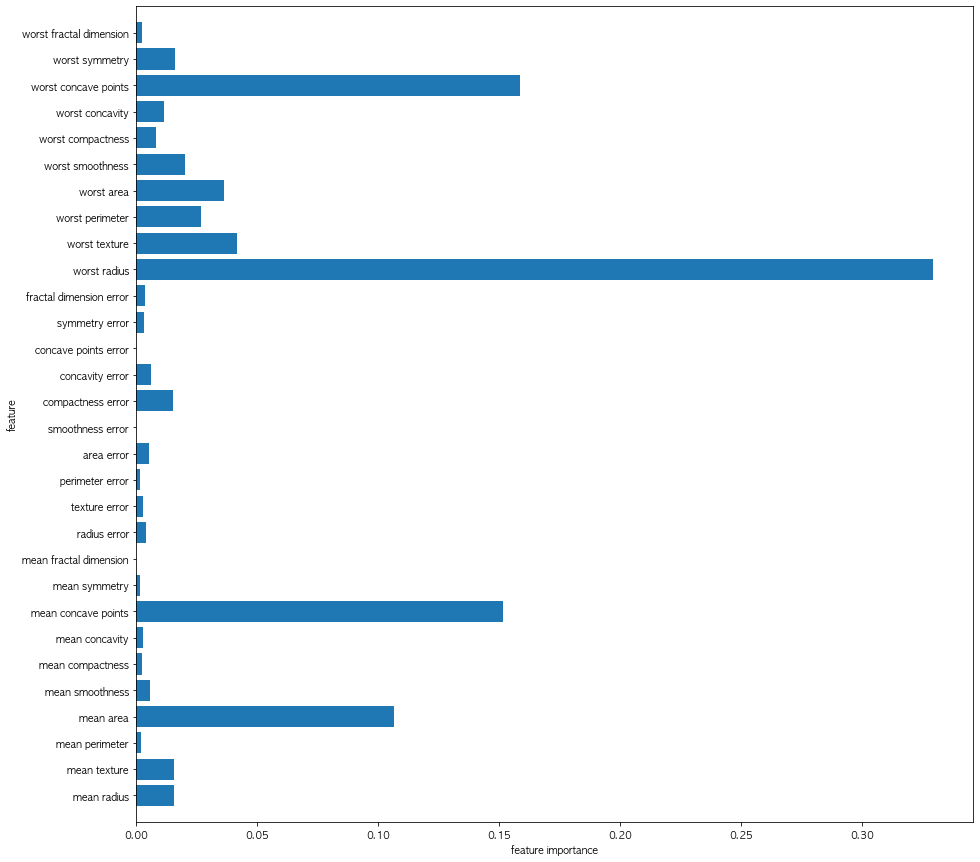

In [33]:
def plot_feature_important_common(model, dataset, col_names):
    
    imp = model.feature_importances_
    n_features = dataset.shape[1]
    feature_names = col_names
    
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), imp, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)
    
n_fea = cancer.data.shape[1]
plot_feature_important_common(rf, cancer.data, cancer.feature_names)


*make_moons는 새로운 데이터 셋인가보다!*

In [45]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
m = RandomForestClassifier(n_estimators=5, random_state=2) # 5개의 트리
m.fit(X_train, y_train)

(100, 2) (100,)


RandomForestClassifier(n_estimators=5, random_state=2)

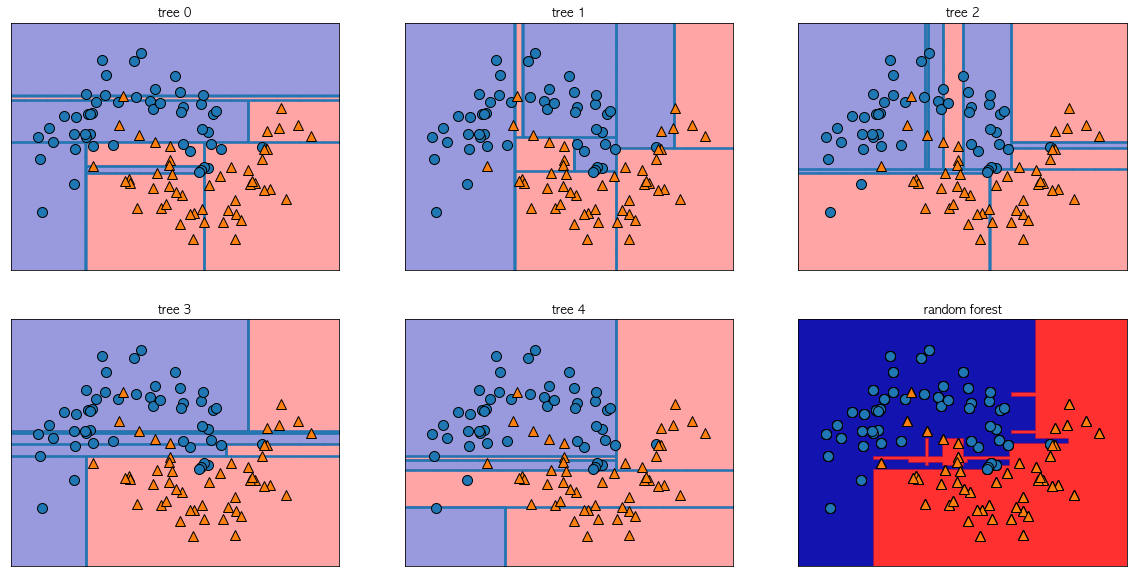

In [47]:
# 《introduction to ml with python》 pp.118 
import mglearn

fig, axes = plt.subplots(2,3, figsize=(20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), m.estimators_)):
    ax.set_title("tree {}".format(i))  # 각 그래프 제목
    
    # 그래프 그리기 
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    mglearn.plots.plot_2d_separator(m, X, fill=True, ax=axes[-1,-1], alpha=.4)
    axes[-1, -1].set_title("random forest")
    
    mglearn.discrete_scatter(X[:, 0],X[:,1], y)

#### ravel()
- 2차원 배열을 1차원으로 바꿔준다. "배열이 쫙 펴진다."

In [48]:
import numpy as np
array = np.arange(15).reshape(3, 5)
print("원래 배열 : \n", array)
print("\n ravel() 함수 이용 : ", array.ravel())


원래 배열 : 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

 ravel() 함수 이용 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [49]:
for i, name in enumerate(['body', 'foo', 'bar']):
    print(i, name)

0 body
1 foo
2 bar


In [50]:
for i1, i2 in zip([11,12,13], [4,5,6]):
    print(i1, i2)

11 4
12 5
13 6


## 랜덤포레스트의 장단점
*from 《Introduction to Machine Learning with Pythoon》*
### 장점
- 현재 가장 널리 사용되는 ML 알고리즘
- 매개변수 튜닝을 하지 않아도 잘 작동
    - cf. DecisionTree는 GridSearchCV를 이용해서 하이퍼파라미터 튜닝
- 

### 단점
- 수십, 수백 개의 트리를 자세하게 분석하기 어렵다. 의사 결정 과정을 간소하게 표현해야한다면 단일 트리를 사용하는 것이 좋다.
- 대량의 데이터셋에서는 시간이 오래 걸린다. 
    - CPU 코어가 많으면 병렬 처리가 가능하다. 
    - `n_jobs` : 코어 수를 지정할 수 있다. 하지만 코어 갯수보다 크게 지정하는 것은 별로 도움이 되지 않고 `n_jobs=-1`로 지정하면 컴퓨터의 모든 코어를 사용
- random_state 에 의존한다. 트리가 많을수록 random_state 에 의한 변동이 덜하다.
- 텍스트 데이터 처럼 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않는다.

## 랜덤포레스트의 인자
- `n_estimators `: 트리의 갯수, 클수록 좋지만 메모리를 많이 쓰고 시간이 오래 걸린다.
- `max_features` : 사용하는 feature의 갯수 제한, 얼마나 무작위가 될지를 결정하며 과대적합을 줄여준다. 일반적으로 기본값을 쓰는 것이 좋고, __분류는 sqrt(n_feature)를, 회귀는 n_features__ 을 기본적으로 사용한다.